# **Data Analysis for Clustering**

#### Project Explaination 🦺

The goal is to predict passenger satisfaction and use the insights to improve key business metrics such as customer retention, revenue per flight, and operational efficiency. By understanding what drives satisfaction, airlines can target specific areas for improvement and personalize the passenger experience.

This dataset can lead to 2 business use cases

- <mark>Real-Time In-flight Experience Improvement:

    ***Objective:***

    Use real-time data to improve the in-flight experience based on passenger satisfaction predictions.

    ***How It Works:*** 
    
    Use predictive models to adjust in-flight services dynamically. 
    
    ***For example:***

    If a flight is predicted to have a high chance of dissatisfaction (e.g., due to a long flight or past delays), increase the availability of onboard services such as free snacks, upgraded entertainment, or complimentary beverages.
    Engage passengers through personalized messages, improving interaction and making passengers feel valued.

    ***Impact:***
    
    Improves real-time satisfaction, reduces the likelihood of negative reviews, and creates a positive in-flight experience.

- <mark>Personalized Customer Service and Targeted Promotions:

    ***Objective:***

    Use satisfaction prediction models to anticipate customer needs and provide personalized services during the booking process and in-flight.

    ***How It Works:*** 

    Use the prediction model to identify passengers who are likely to be unsatisfied based on past experiences, preferences, or demographic factors. Offer personalized services such as:

    - Upgrades to higher flight classes.
    - Special seat preferences or in-flight services (e.g., meals, entertainment).
    - Early boarding or fast check-in processes.

    ***Impact:*** 
    
    Increases customer satisfaction and loyalty, leading to repeat business and higher lifetime value.

### -------------------------------------------------------------------------------------------------------------

#### About Dataset 📚

***Context***

US Airline passenger satisfaction survey

***Content***

"Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)"

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

"Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)"

"Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)"

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey

"Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

Ease of Online booking: Satisfaction level of online booking

Inflight service Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Flight cancelled: Whether the Flight cancelled or not (Yes, No)

Flight time in minutes: Minutes of Flight takes

***Source***

https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

### -------------------------------------------------------------------------------------------------------------

## 1. **Data Exploration**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("../datasets/train.csv")
df_copy = df.copy()
df_copy.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df_copy.describe().T

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

Check if there is any missing value

In [6]:
df_copy.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Unnamed: 0                             0
Online boarding                        0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Food and drink                         0
id                                     0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
satisfaction    

Encode target label to be 0 and 1 as a binary classification for visualization

In [7]:
df_copy["satisfaction"] = df_copy['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df_copy

/var/folders/zl/qwgrf6fs1f76494j7nn83v7w0000gn/T/ipykernel_40090/3545082657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["satisfaction"] = df_copy['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

Visualize the frequency of target label (0 = neutral or dissatisfied, 1 = satisfied)

<Axes: xlabel='satisfaction', ylabel='count'>

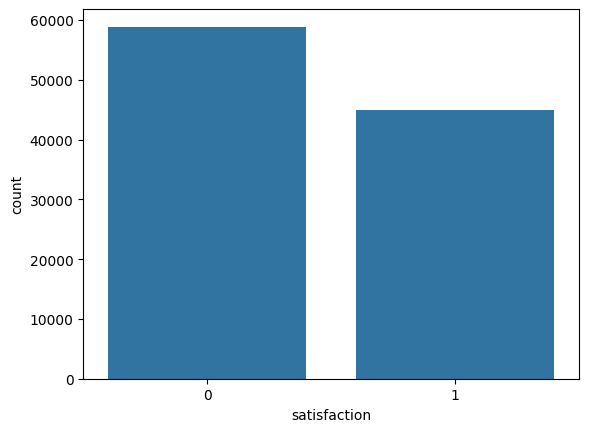

In [8]:
sns.countplot(x="satisfaction", data=df_copy)

Plot histogram for every features to see the frequency

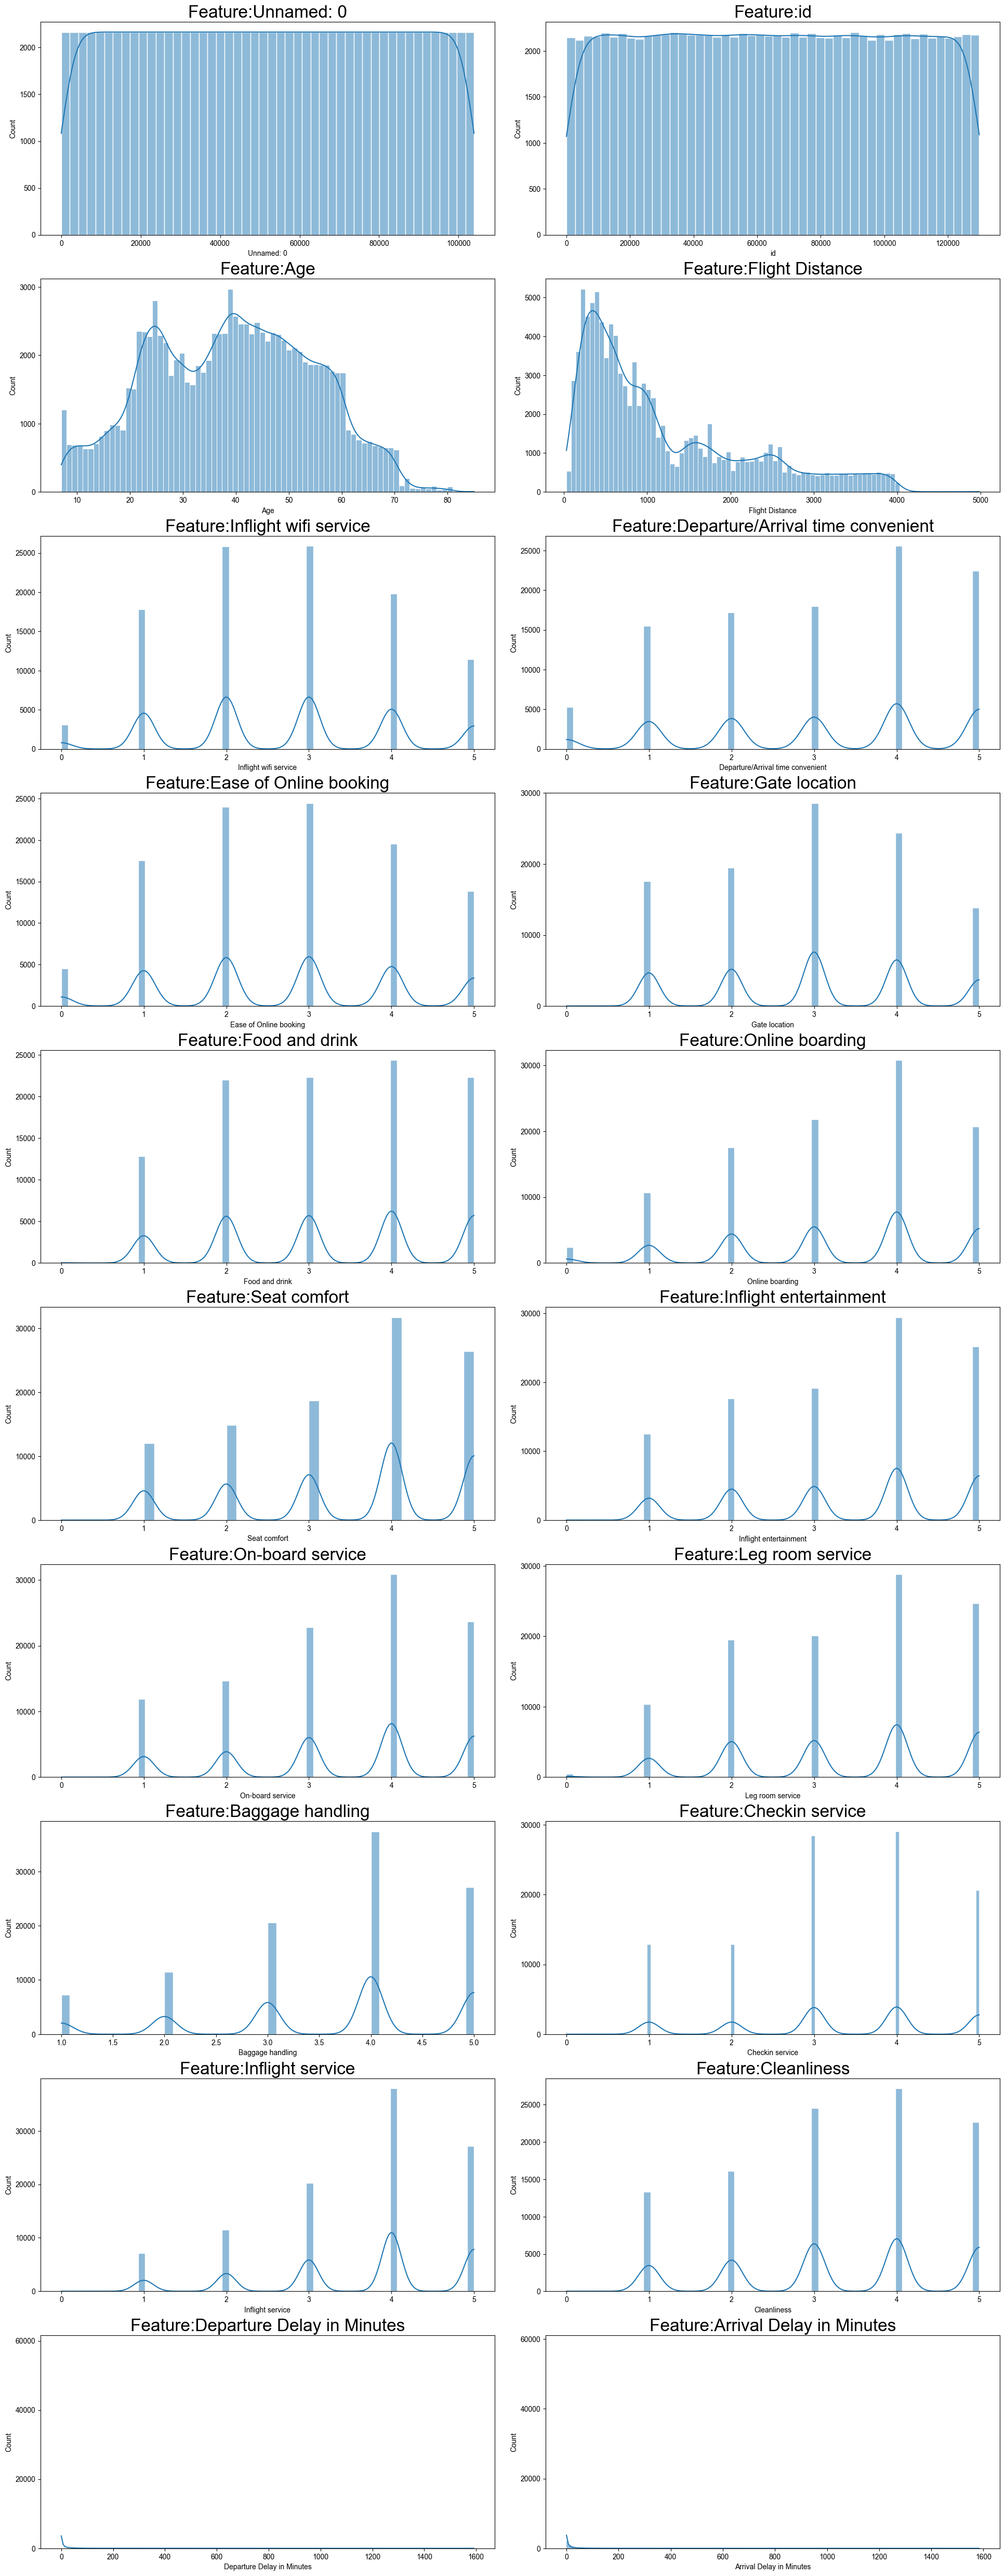

In [9]:
numerics = ['int64', 'float64']

train_con_col = df_copy.select_dtypes(include = numerics).columns
train_cat_col = df_copy.select_dtypes(include = "object").columns

fig, axs = plt.subplots(10, 2, figsize=(20,50))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df_copy,x=df_copy[f],kde=True)
    ax.set_title('Feature:'+ f)

/var/folders/zl/qwgrf6fs1f76494j7nn83v7w0000gn/T/ipykernel_40090/957318549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Arrival Delay in Minutes'])


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

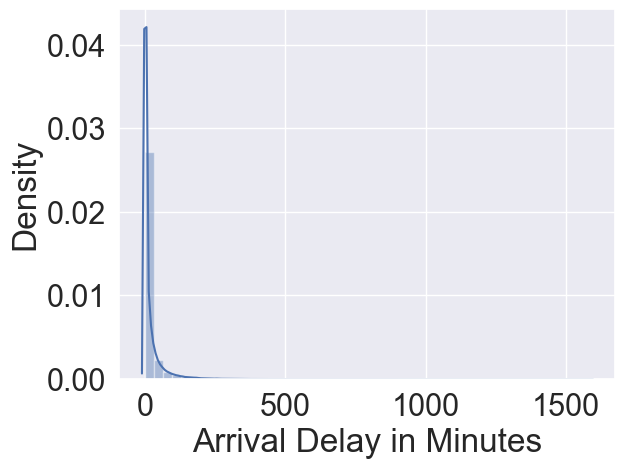

In [10]:
sns.distplot(df_copy['Arrival Delay in Minutes'])

/var/folders/zl/qwgrf6fs1f76494j7nn83v7w0000gn/T/ipykernel_40090/834750658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Departure Delay in Minutes'])


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

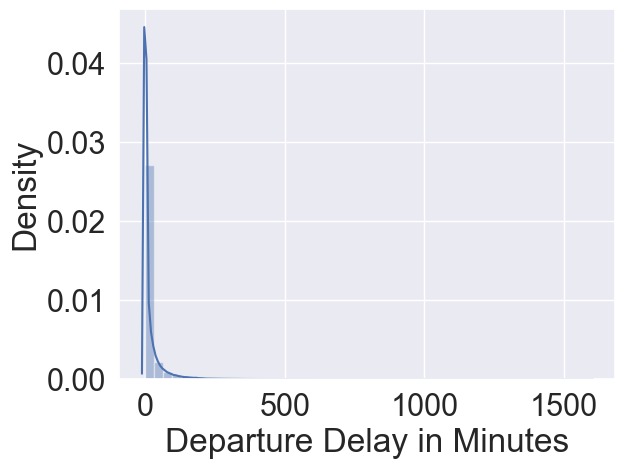

In [11]:
sns.distplot(df_copy['Departure Delay in Minutes'])

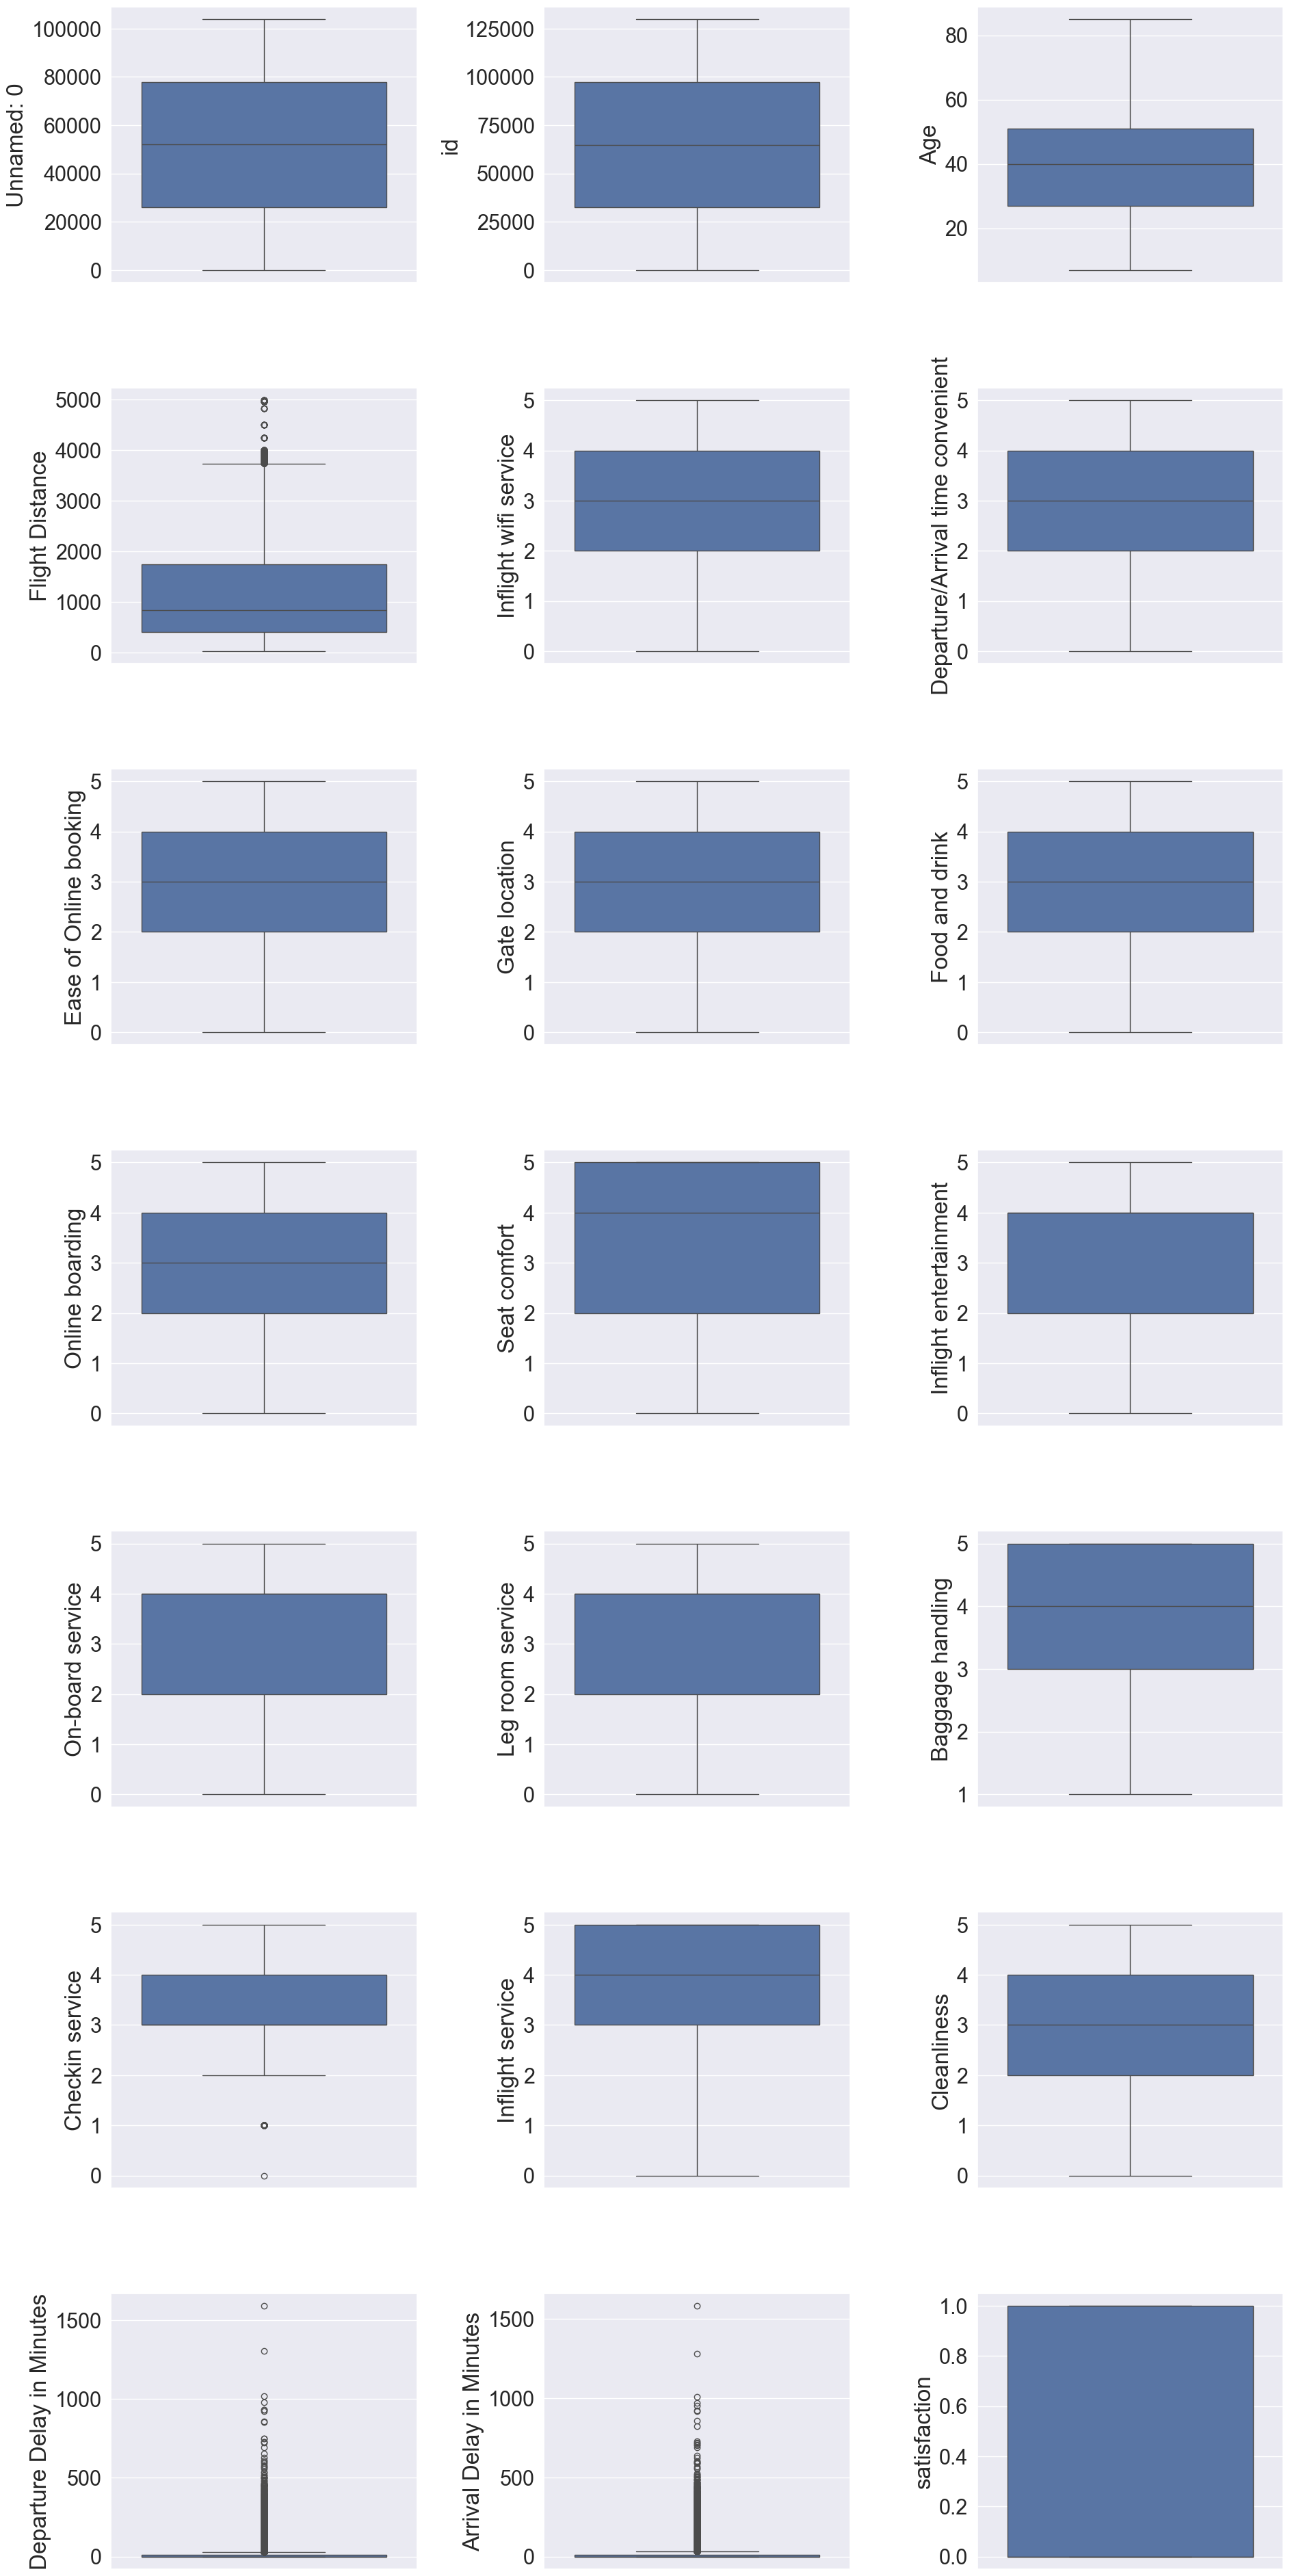

In [12]:
fig, axs = plt.subplots(7, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_copy,y=df_copy[f])

In [13]:
sns.boxplot(ax=ax,data=df_copy,y=df_copy["Arrival Delay in Minutes"])

<Axes: ylabel='satisfaction'>

It can be seeing that the delay time minutes exists so many outliers.

Generally, passenger satisfy with the baggage handling and inflight service where the score ranges from 3 to 5 while others mainly stay within 2 to 4 scores.

### See category of customers in each topic

In [14]:
def detail_barplot(category):
    fig, axs = plt.subplots(10, 2, figsize=(20, 60))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_copy)

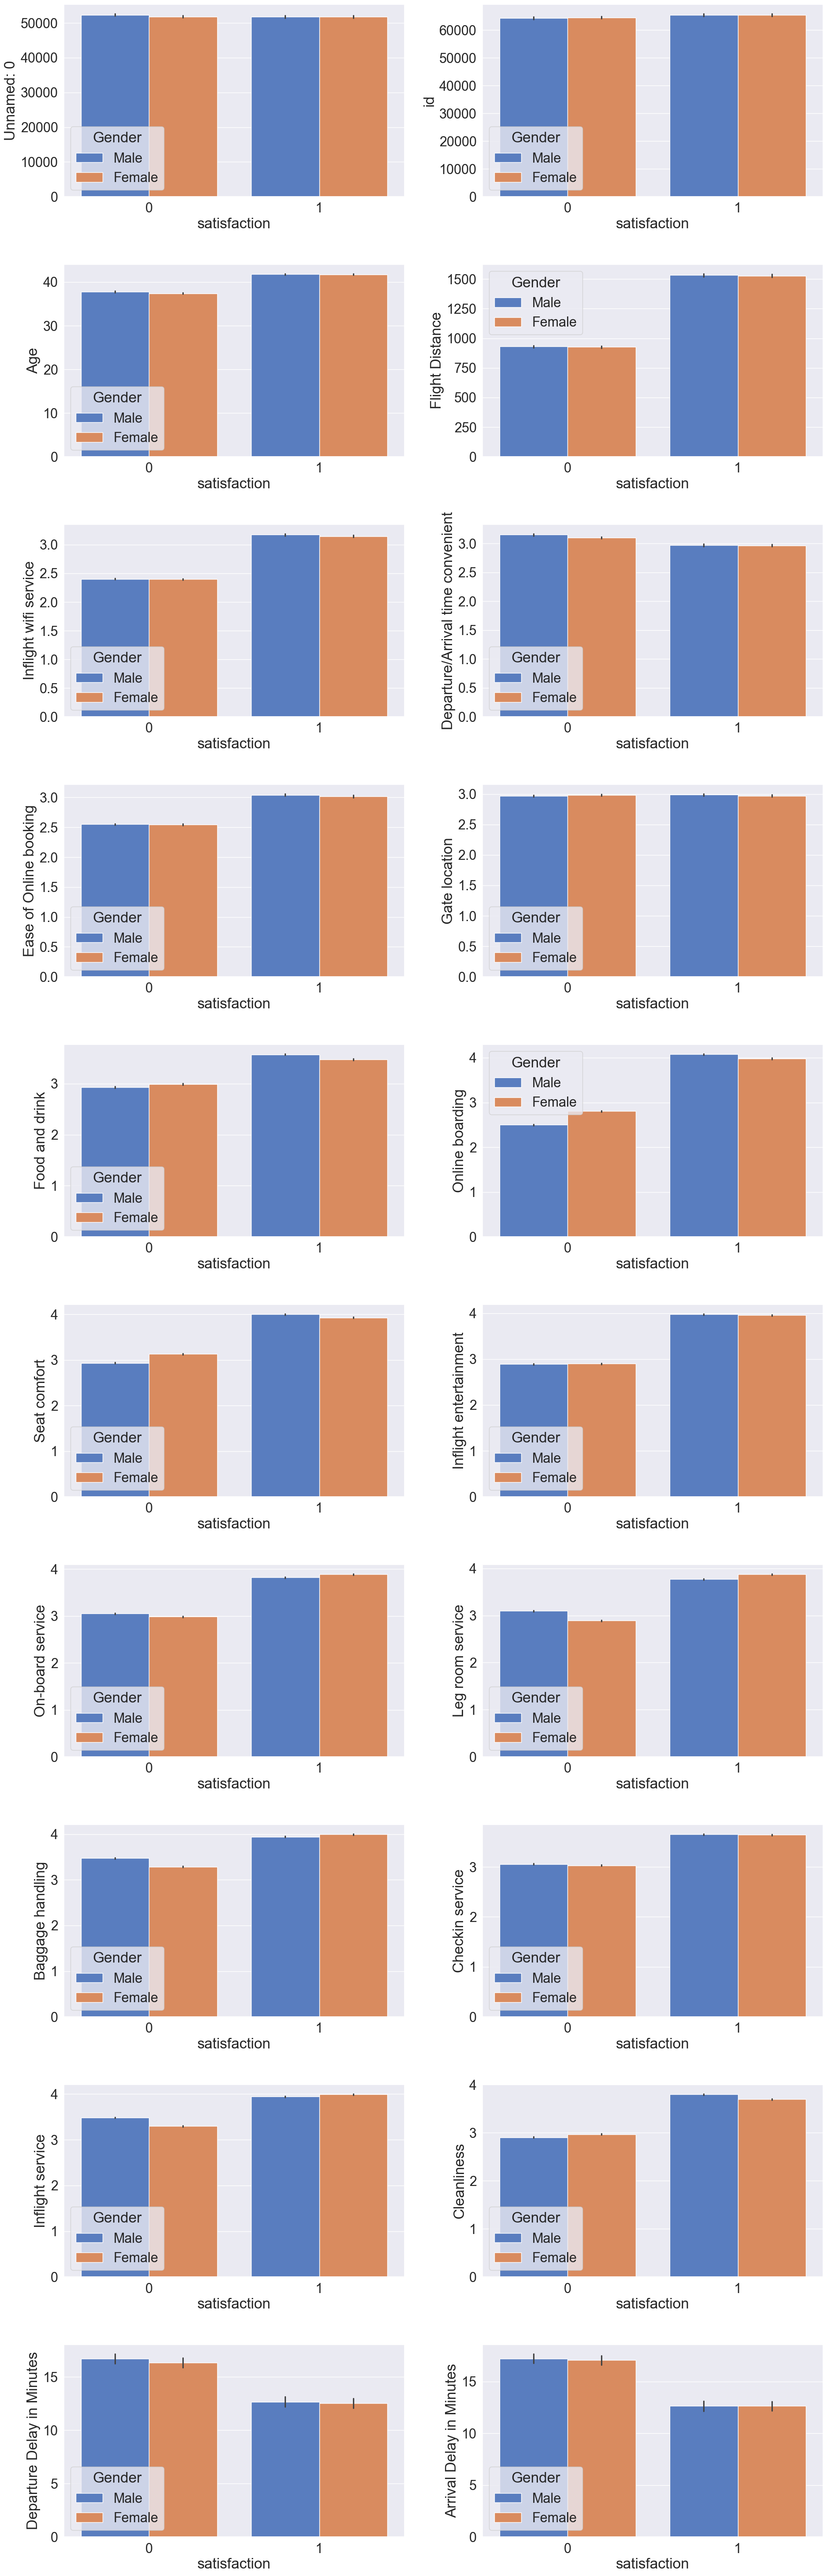

In [15]:
detail_barplot("Gender")

Based on the result for gender,

the long flight distance make them more likely to satisfy the trip.

But in average of delay time, they may not satisfy when time is 13 mins above.

Between the male and female, there are no significant patterns.

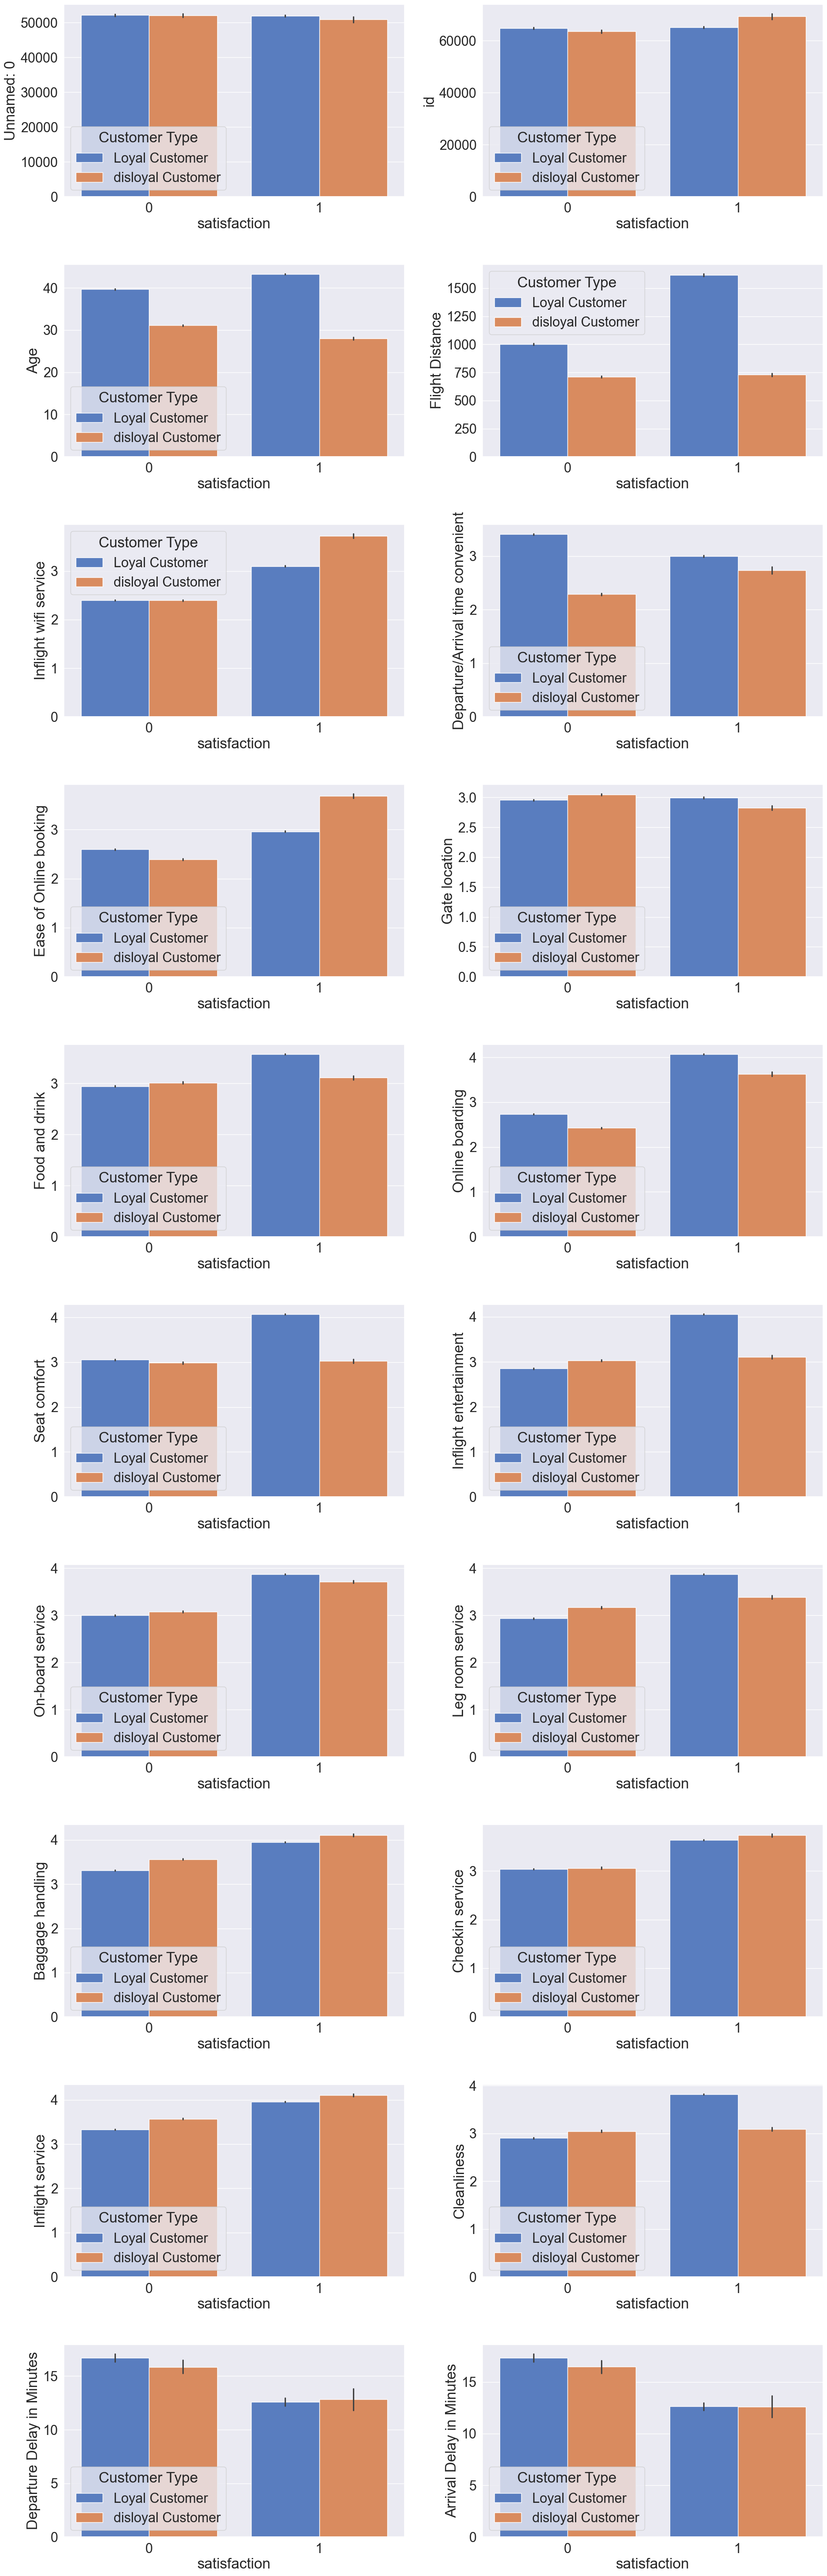

In [16]:
detail_barplot("Customer Type")

- For loyal customer:

    - Age around 40
    - Satisfy on high flight distance, seat comfort, inflight entertainment, airline service (ex. inflight, check-in, food and drinks), cleanliness


- For disloyal customer:

    - Age around 30
    - Satisfy on Inflight wifi service, ease of online booking
    
> Again, they generally feel neutral or dissatisfied when the delay time minutes is 12.5 or above.

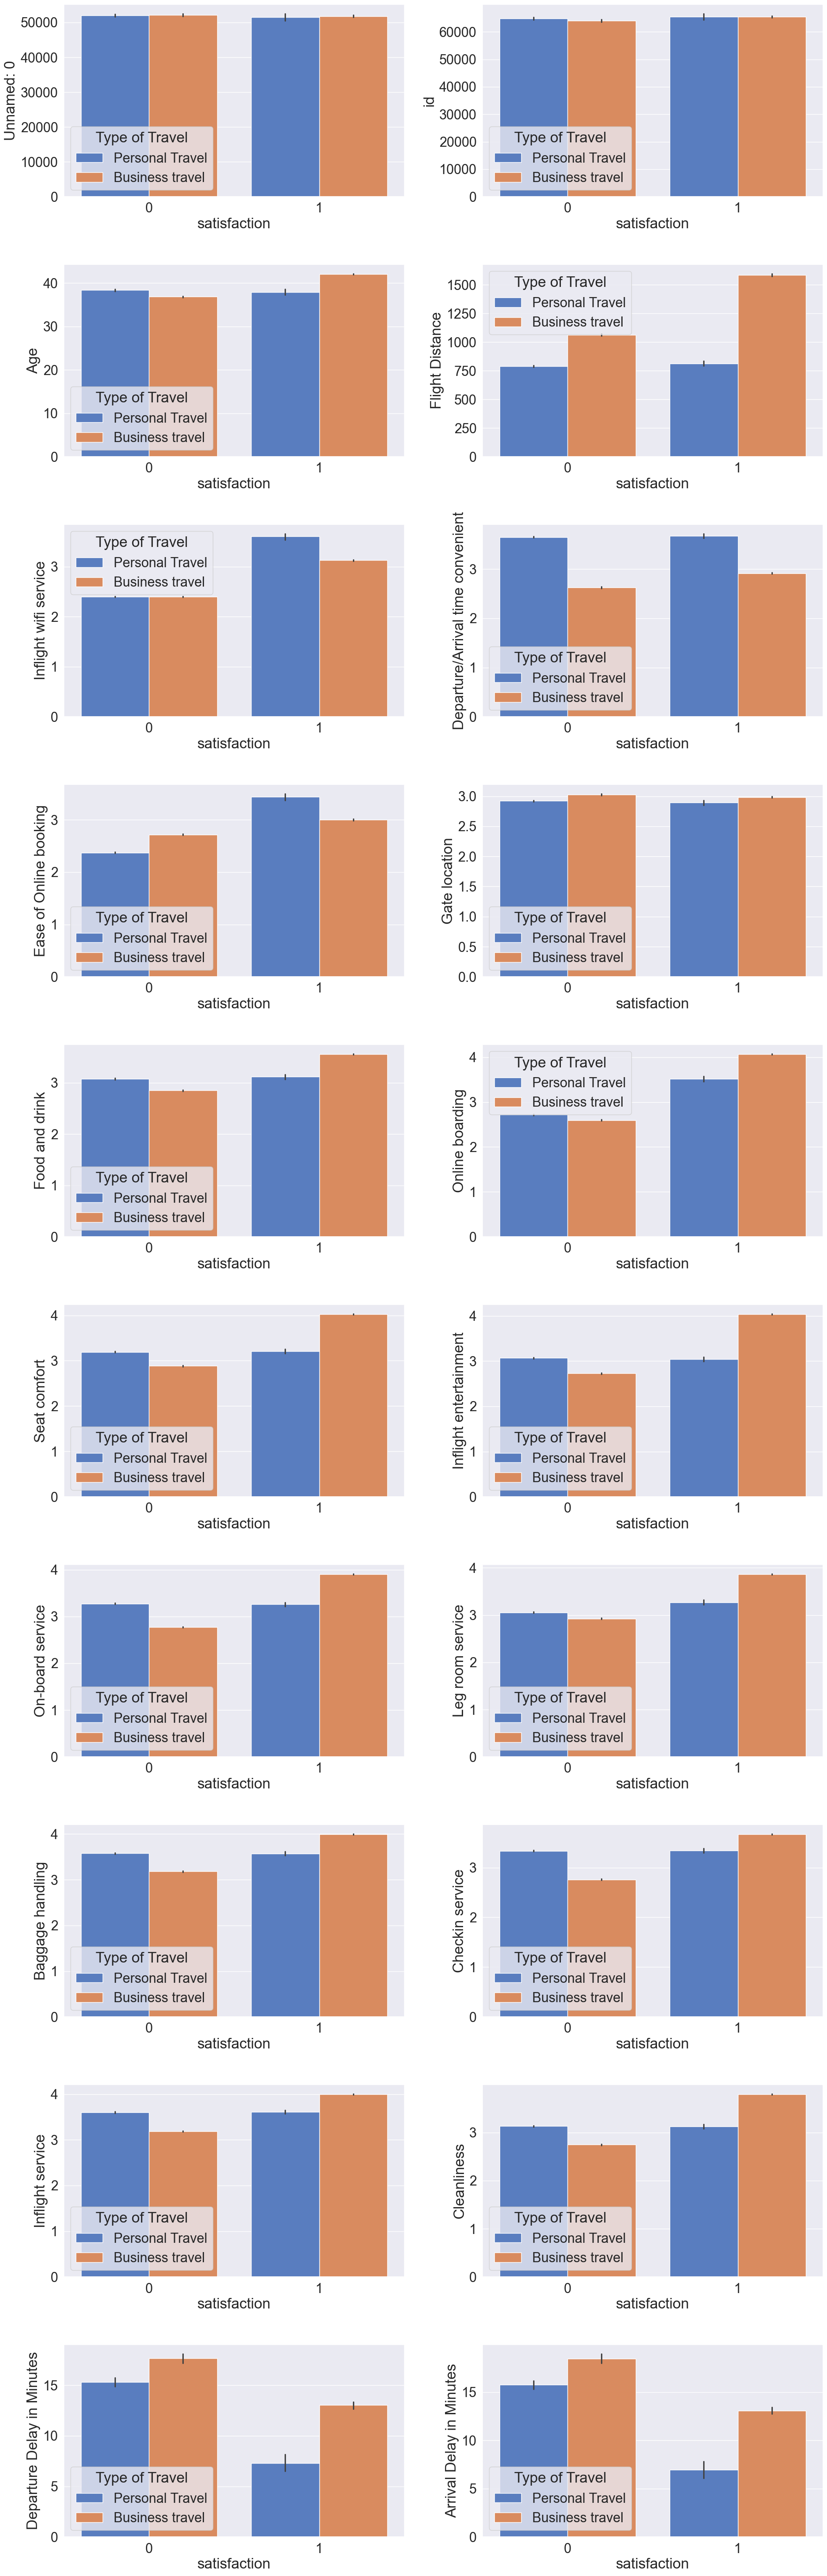

In [17]:
detail_barplot("Type of Travel")

- For personal travel:

    - Satisfy on inflight wifi services, ease of online booking
    - Average of delay time is 7.5 minutes for satisfied group

- For business travel:

    - Satisfy on flight distance, online boarding, seat comfort, inflight entertainment, on-board service, cleanliness

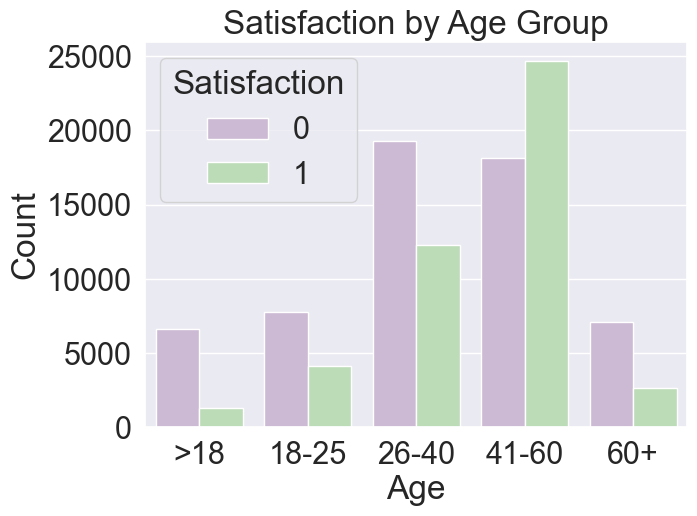

In [18]:
bins = [0, 18, 25, 40, 60, 90]
labels = ['>18', '18-25', '26-40', '41-60', '60+']
df_copy['Age Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels, right=False)

# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='Age Group', hue='satisfaction', palette='PRGn')
plt.title('Satisfaction by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

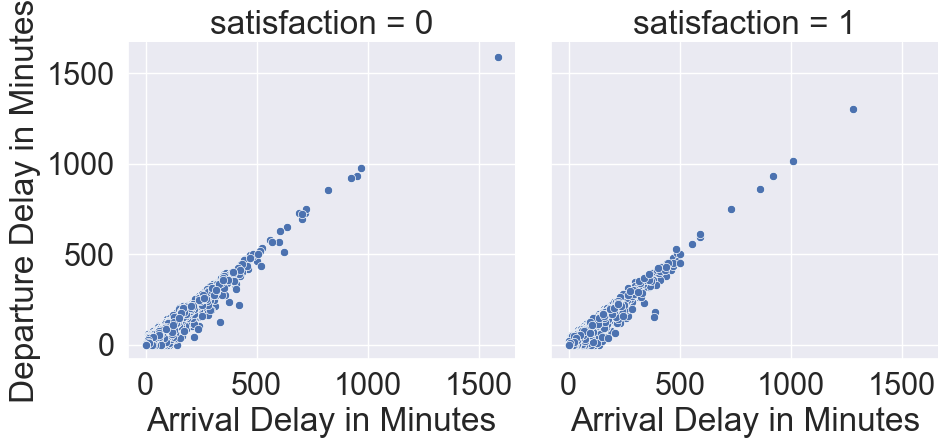

In [19]:
sns.relplot(data=df_copy,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',col='satisfaction')

### Correlation matrix

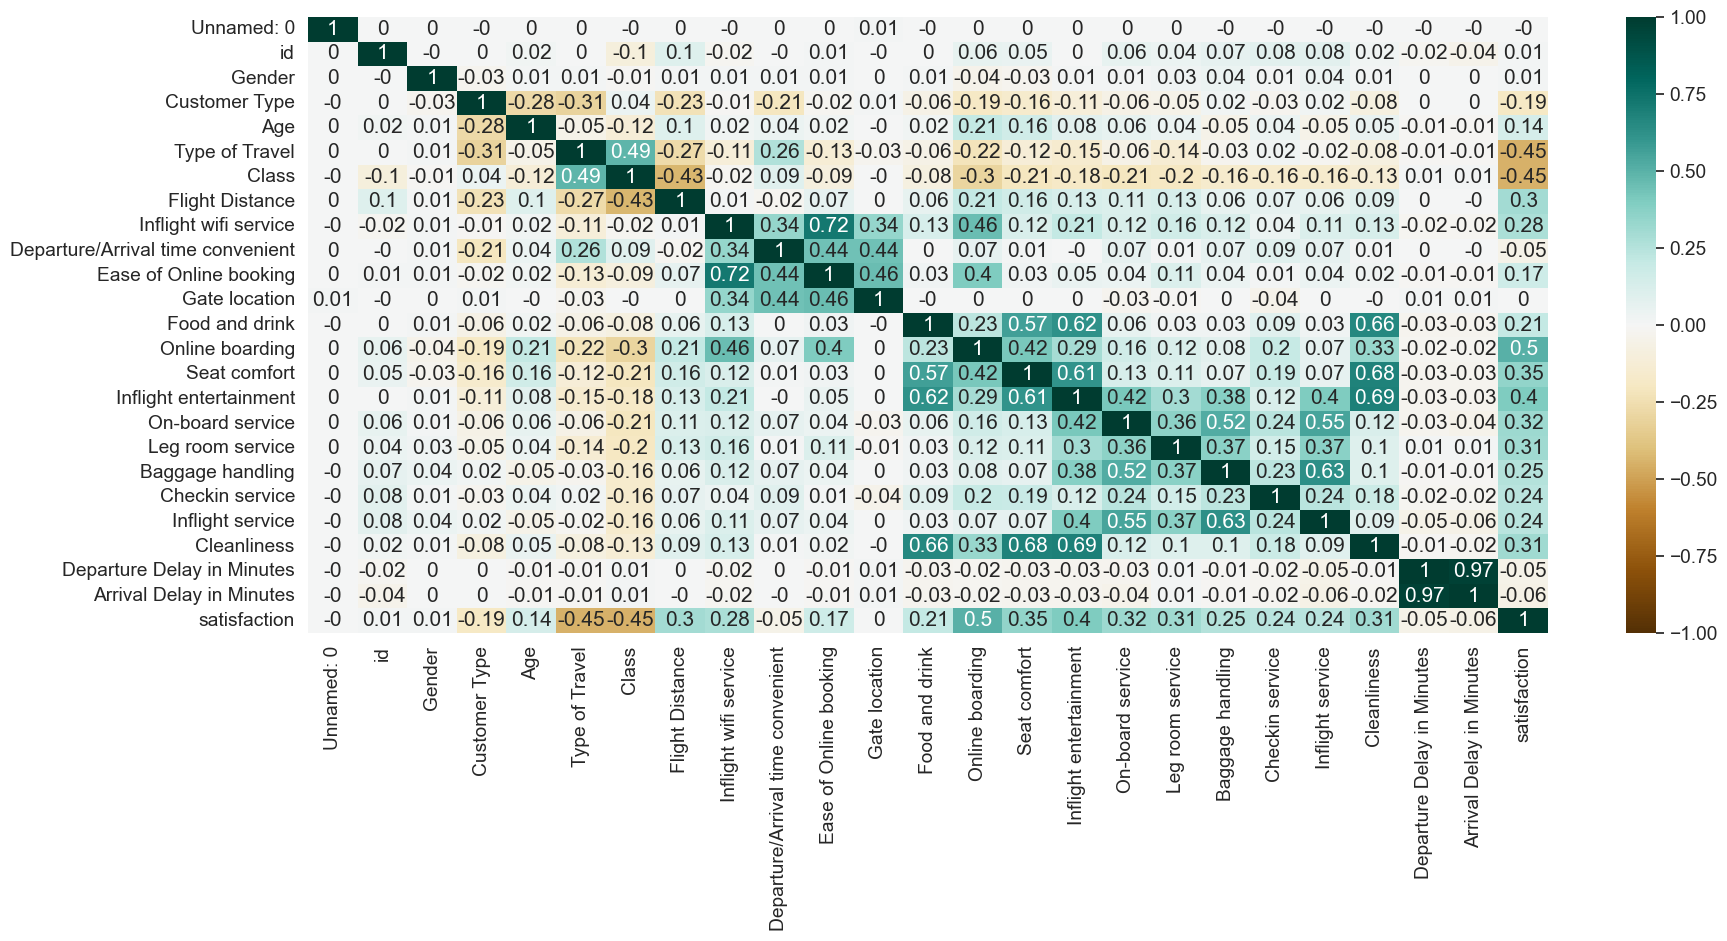

In [20]:
df_copy.drop("Age Group", axis=1, inplace=True)
for cat in train_cat_col:
    le = LabelEncoder()
    df_copy[cat] = le.fit_transform(df_copy[cat])

plt.figure(figsize=(20, 8))
sns.set(font_scale = 1.25)
ax = sns.heatmap(df_copy.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Conclusion

## What we need to do to our data?


### 1. Feature Extraction and Feature Selection 🚀

Create new features by combining scores into broader categories. 
Including 4 features, which are


First feature, we named it ***<mark>“Inflight Comfort & Quality”*** as the components with the highest loading scores are related to spending quality time inside the flight.
1) Cleanliness (0.854)
2) Food and drink (0.77)
3) Inflight entertainment (0.766)

Second feature, we named it ***<mark>“Customer Service Quality”*** as the components with the highest loading score are related to receiving quality service during the whole journey, from getting on the flight to arriving at the destination.
1) Inflight service (0.799)
2) Baggage handling (0.76)
3) On-board service (0.7)

Third feature, we named it ***<mark>“Convenience and Efficiency”*** as the components with the highest loading score are related to optimizing time efficiency throughout the entire journey.
1) Ease of online booking (0.766)
2) Gate location (0.68)
3) Inflight wifi service (0.605)

Fourth feature, we named it ***<mark>“Technological Accessibility”*** as the components with the highest loading score are related to the convenience of flight experience through ease of online access.
1) Online boarding (0.7565)
2) Inflight wifi service (0.478)
3) Ease of online booking (0.463)
    
Classify Overall Satisfaction: Convert the overall satisfaction score into a binary variable (Satisfied or Unsatisfied), where a score above a certain threshold (e.g., 3.5) is classified as satisfied.

And also about feature selection that we are goinf to pick the data that correlates to the target label.

### -------------------------------------------------------------------------------------------------------------

### 2. Data Transformation 💥

We need to clean our data by remove idness feature, deal with missing value and outliers and so on...

### -------------------------------------------------------------------------------------------------------------

## Data Cleansing

In [21]:
df_cleaned = df_copy.copy()

In [22]:
df_cleaned = df_cleaned.drop(['id'], axis=1)
df_cleaned

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0                0       1              0   13               1      2   
1                1       1              1   25               0      0   
2                2       0              0   26               0      0   
3                3       0              0   25               0      0   
4                4       1              0   61               0      0   
...            ...     ...            ...  ...             ...    ...   
103899      103899       0              1   23               0      1   
103900      103900       1              0   49               0      0   
103901      103901       1              1   30               0      0   
103902      103902       0              1   22               0      1   
103903      103903       1              0   27               0      0   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                

### Feature Extraction

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import numpy as np

Get just rating topics to do PCA for feature selection

In [24]:
df_pca = df_cleaned.copy()
df_pca = df_pca.iloc[:, 6:20]
df_pca

Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  
0                      4                4                 5  
1                      3                1                 4  
2                      4                4                 4  
3                      3                1                 4  
4                      4                3                 3  
...                  ...              ...               ...  
103899                 4                2                 3  
103900                 5                5                 5  
103901                 4                5                 5  
103902                 1                5                 4  
103903                 4                4                 3  

[103904 rows x 14 columns]

In [25]:
check_na = df_pca.isna().sum().to_frame().reset_index()
check_na

index  0
0                     Flight Distance  0
1               Inflight wifi service  0
2   Departure/Arrival time convenient  0
3              Ease of Online booking  0
4                       Gate location  0
5                      Food and drink  0
6                     Online boarding  0
7                        Seat comfort  0
8              Inflight entertainment  0
9                    On-board service  0
10                   Leg room service  0
11                   Baggage handling  0
12                    Checkin service  0
13                   Inflight service  0

Firstly, do the standardization

In [26]:
# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_pca)

In [27]:
# PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [28]:
# Check Eigen Score
eigen_values = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_ratio = variance_ratio.cumsum()

In [29]:
# To DataFrame
pca_results = pd.DataFrame({
    'eigenvalue': eigen_values,
    'percentage of variance': variance_ratio,
    'cumulative percentage of variance': cumulative_ratio
})
pca_results.index = ['comp ' + str(i+1) for i in pca_results.index]

In [30]:
pca_results

eigenvalue  percentage of variance  cumulative percentage of variance
comp 1     3.474641               24.818625                          24.818625
comp 2     2.327560               16.625267                          41.443892
comp 3     1.876900               13.406298                          54.850191
comp 4     1.119837                7.998761                          62.848952
comp 5     0.948680                6.776220                          69.625171
comp 6     0.911883                6.513386                          76.138557
comp 7     0.691213                4.937187                          81.075744
comp 8     0.539890                3.856323                          84.932067
comp 9     0.494783                3.534131                          88.466199
comp 10    0.462662                3.304697                          91.770895
comp 11    0.368636                2.633092                          94.403987
comp 12    0.317389                2.267042                          96.671029
comp 13    0.254045                1.814591                          98.485620
comp 14    0.212015                1.514380                         100.000000

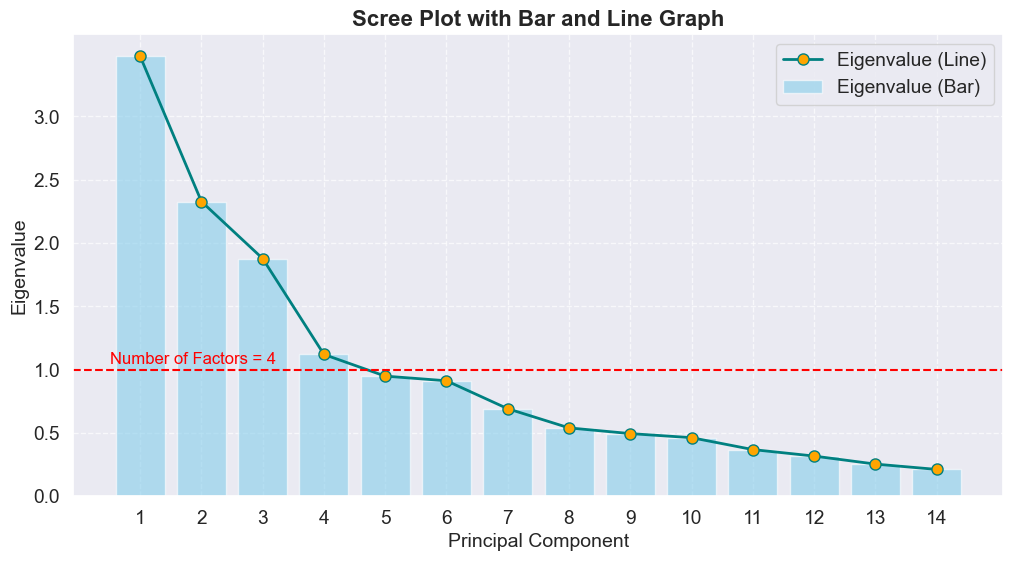

In [31]:
# Visualize the result
plt.figure(figsize=(12,6))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, alpha=0.6, color='skyblue', label='Eigenvalue (Bar)')
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2, color='teal', markerfacecolor='orange', markersize=8, label='Eigenvalue (Line)')
plt.title('Scree Plot with Bar and Line Graph', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.axhline(y=1, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(pca.explained_variance_) + 1))
plt.yticks(np.arange(0, max(pca.explained_variance_), step=0.5))
plt.legend()

n_factors = np.sum(pca.explained_variance_ >= 1)
plt.text(0.5, 1.05, f'Number of Factors = {n_factors}', color = 'red', fontsize=12)

plt.show()

In [32]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(data_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [33]:
loadings_df = pd.DataFrame(fa.loadings_, index=df_pca.columns, columns=[f'Factor{i+1}' for i in range(4)])
loadings_df

Factor1   Factor2   Factor3   Factor4
Flight Distance                    0.098730 -0.018604  0.083302  0.211155
Inflight wifi service              0.109114  0.679220  0.087120  0.342088
Departure/Arrival time convenient  0.063439  0.577179 -0.005994 -0.065868
Ease of Online booking             0.010338  0.837920 -0.041616  0.312863
Gate location                     -0.032031  0.627543  0.025481 -0.149632
Food and drink                    -0.008536  0.031724  0.777766  0.085211
Online boarding                    0.072367  0.191589  0.211715  0.857058
Seat comfort                       0.064986 -0.011455  0.713062  0.294088
Inflight entertainment             0.457750  0.037564  0.780996  0.102132
On-board service                   0.695501  0.014878  0.091732  0.097476
Leg room service                   0.479303  0.053149  0.055662  0.121525
Baggage handling                   0.763690  0.042046  0.039564  0.007007
Checkin service                    0.282455 -0.011634  0.075479  0.173793
Inflight service                   0.798776  0.038945  0.044660 -0.012006

In [34]:
# Iterate over each factor and get the top 3 highest values
for factor in loadings_df.columns:
    # Create an empty DataFrame to store the results
    top3_df = pd.DataFrame()
    top3_df[factor] = loadings_df[factor].nlargest(3)
    # Print the result
    print(top3_df, "\n")

                   Factor1
Inflight service  0.798776
Baggage handling  0.763690
On-board service  0.695501 

                         Factor2
Ease of Online booking  0.837920
Inflight wifi service   0.679220
Gate location           0.627543 

                         Factor3
Inflight entertainment  0.780996
Food and drink          0.777766
Seat comfort            0.713062 

                         Factor4
Online boarding         0.857058
Inflight wifi service   0.342088
Ease of Online booking  0.312863 



Create new features by combining scores into broader categories. 
Including 4 features, which are


First feature, we named it ***<mark>“Inflight Comfort & Quality”*** as the components with the highest loading scores are related to spending quality time inside the flight.
1) Cleanliness (0.854)
2) Food and drink (0.77)
3) Inflight entertainment (0.766)

Second feature, we named it ***<mark>“Customer Service Quality”*** as the components with the highest loading score are related to receiving quality service during the whole journey, from getting on the flight to arriving at the destination.
1) Inflight service (0.799)
2) Baggage handling (0.76)
3) On-board service (0.7)

Third feature, we named it ***<mark>“Convenience and Efficiency”*** as the components with the highest loading score are related to optimizing time efficiency throughout the entire journey.
1) Ease of online booking (0.766)
2) Gate location (0.68)
3) Inflight wifi service (0.605)

Fourth feature, we named it ***<mark>“Technological Accessibility”*** as the components with the highest loading score are related to the convenience of flight experience through ease of online access.
1) Online boarding (0.7565)
2) Inflight wifi service (0.478)
3) Ease of online booking (0.463)

In [35]:
scores = fa.transform(df_pca)
print(scores)
df_pca['Inflight Comfort and Quality'] = scores[:, 0]
df_pca['Customer Service Quality'] = scores[:, 1]
df_pca['Convenience and Efficiency'] = scores[:, 2]
df_pca['Technological Accessibility'] = scores[:, 3]

[[ 13.06587253  -7.96346761   2.39108498  15.14815976]
 [  7.42008979  -2.69240064  -0.96392859   9.07092514]
 [ 25.52580432 -25.14929333  -0.14010855  37.07457647]
 ...
 [ 41.84710964 -45.32459815  -3.88164466  58.90310392]
 [ 22.26296637 -21.70697044  -3.49563426  29.87801026]
 [ 35.40781772 -37.45130898  -6.15397674  51.17450025]]


In [36]:
df_pca.shape

(103904, 18)

In [37]:
sampled_dataset = df_pca.iloc[:, 14:].sample(n=10000, random_state=42)
sampled_dataset.head()

Inflight Comfort and Quality  Customer Service Quality  \
80638                     20.897643                -17.176028   
43398                      9.647522                 -4.141849   
32751                      7.736970                 -3.058881   
33571                     22.789390                -21.244370   
71287                     23.285071                -24.419606   

       Convenience and Efficiency  Technological Accessibility  
80638                    1.064339                    25.607342  
43398                    1.040922                    12.830000  
32751                    1.816941                     7.125849  
33571                   -0.429724                    30.558064  
71287                   -2.135577                    34.490707

## K-Means clustering

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(sampled_dataset)
sampled_dataset["Cluster"] = kmeans.labels_

In [40]:
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=df_pca.columns[14:])
centers_df

Inflight Comfort and Quality  Customer Service Quality  \
0                     63.340343                -71.072998   
1                     13.951090                -10.151453   
2                     36.355488                -37.627594   

   Convenience and Efficiency  Technological Accessibility  
0                   -9.120346                    95.544373  
1                    0.363777                    18.011290  
2                   -3.933943                    53.206438

In [42]:
result_df = centers_df
result_df["Customer Group"] = ["Inflight Experience Oriented", "Quality-conscious", "Boarding Experience Oriented"]
result_df

Inflight Comfort and Quality  Customer Service Quality  \
0                     63.340343                -71.072998   
1                     13.951090                -10.151453   
2                     36.355488                -37.627594   

   Convenience and Efficiency  Technological Accessibility  \
0                   -9.120346                    95.544373   
1                    0.363777                    18.011290   
2                   -3.933943                    53.206438   

                 Customer Group  
0  Inflight Experience Oriented  
1             Quality-conscious  
2  Boarding Experience Oriented

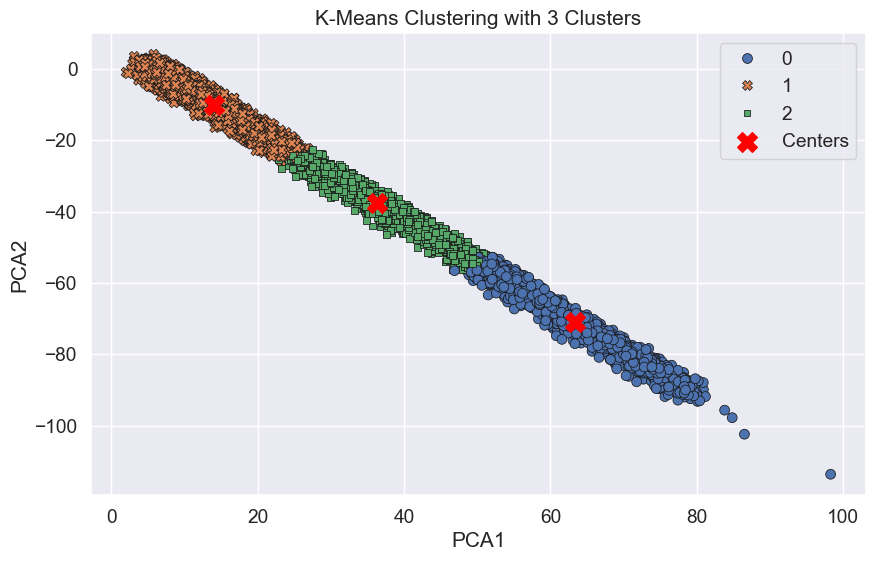

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(x=sampled_dataset['Inflight Comfort and Quality'], y=sampled_dataset['Customer Service Quality'], 
                hue=sampled_dataset['Cluster'], palette="deep", 
                style=sampled_dataset['Cluster'], s=50, edgecolor='k')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')

plt.title("K-Means Clustering with 3 Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

